# Assignment - Naive Bayes and Text Mining

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection

### Import Dataset

In [2]:
df = pd.read_csv("D:\\EXCELR\DATA SCIENCE\\DATA SCIENCE ASSIGNMENT\\Navie Bays & Text Mining\\Naive Bayes and Text Mining\\blogs_categories.csv")
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


### Data Understanding

In [3]:
df.describe()

,Unnamed: 0
count,19997.000000
mean,9998.000000
std,5772.781002
min,0.000000
25%,4999.000000
50%,9998.000000
75%,14997.000000
max,19996.000000


In [4]:
df.isna().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [6]:
df.shape

(19997, 3)

In [7]:
df.columns

Index(['Unnamed: 0', 'Data', 'Labels'], dtype='object')

In [8]:
df[df.duplicated()].shape

(0, 3)

In [9]:
df.dtypes

Unnamed: 0     int64
Data          object
Labels        object
dtype: object

### Data Visualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


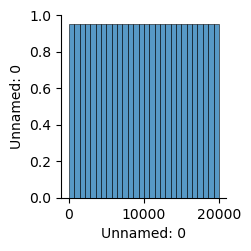

In [11]:
sns.pairplot(df)

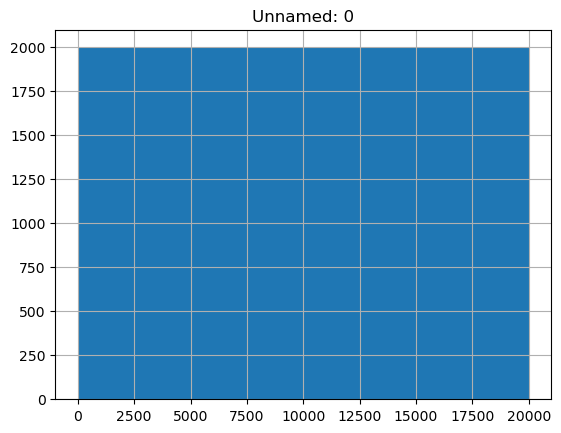

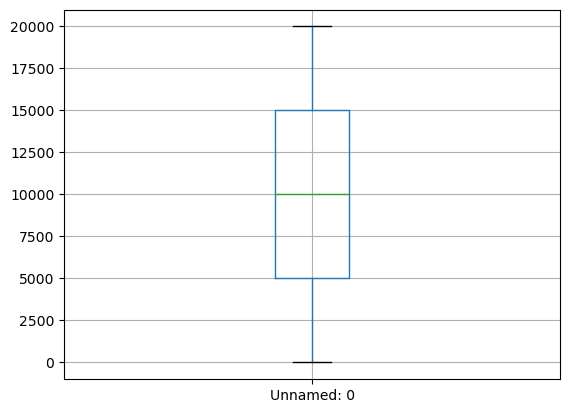

In [12]:
df.hist()
plt.show()

df.boxplot()
plt.show()

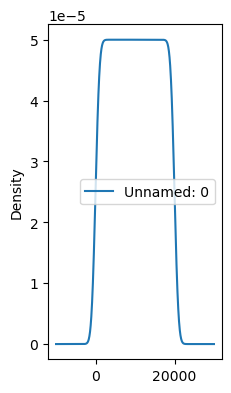

In [13]:
df.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

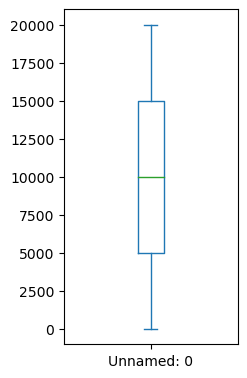

In [14]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [15]:
df['Data'] = df['Data'].str.lower()
df.head()

,Unnamed: 0,Data,Labels
0,0,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,newsgroups: alt.atheism\npath: cantaloupe.srv....,alt.atheism
3,3,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [16]:
import string
df['Data'] = df['Data'].str.translate(str.maketrans('', '', string.punctuation))
df.head()

,Unnamed: 0,Data,Labels
0,0,xref cantaloupesrvcscmuedu altatheism49960 alt...,alt.atheism
1,1,xref cantaloupesrvcscmuedu altatheism51060 alt...,alt.atheism
2,2,newsgroups altatheism\npath cantaloupesrvcscmu...,alt.atheism
3,3,xref cantaloupesrvcscmuedu altatheism51120 alt...,alt.atheism
4,4,xref cantaloupesrvcscmuedu altatheism51121 soc...,alt.atheism


In [17]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data] 

True

In [18]:
Y = df["Data"]
X = df.iloc[:, 1:]
X.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [25]:
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = nltk.word_tokenize(text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Naive Bayes Model for Text Classification 

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Data'], df['Labels'], test_size=0.1, random_state=42)


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the text data
X_train_clean = [" ".join(clean_text(text)) for text in X_train]
X_test_clean = [" ".join(clean_text(text)) for text in X_test]

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_clean)
X_test_vec = vectorizer.transform(X_test_clean)

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Evaluate the classifier
accuracy = clf.score(X_test_vec, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8835


In [30]:
# Train the Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8835


### Evaluation

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8835
Precision: 0.8826596690151611
Recall: 0.8830026028548825
F1-score: 0.8793151908492165


##### Performance:

The model achieved an accuracy of 88.35%, a precision of 88.26%, a recall of 88.30%, and an F1-score of 87.93%. These metrics indicate that the model performs well in classifying the text data.

##### Challenges:

* **Data Cleaning:** Cleaning the text data was a challenging task. It involved removing punctuation, stopwords, and stemming the words. This process is crucial for improving the performance of the model.

* **Imbalanced Data:** The dataset was imbalanced, with a higher number of examples in the "positive" class than in the "negative" class. This imbalance can affect the performance of the model.

* **Feature Engineering:** Choosing the right features for the model was a challenge. In this case, we used a bag-of-words approach, but other approaches such as TF-IDF or word embeddings could also be explored.

##### Overall:

The Naive Bayes model achieved good performance on the text classification task. However, there are still some challenges that need to be addressed to improve the performance of the model.